In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import coint

In [2]:
sp = pd.read_csv('sp500_stock.csv')
dta = pd.read_csv('broader_stock.csv')

In [3]:
def data_preprocess(dta):
    dta['Date'] = pd.to_datetime(dta['Date'], format='%Y-%m-%d')
    dta = dta.set_index(dta['Date'])
    # NHLI not traded
    dta.drop(['Date', 'NHLI'], axis=1, inplace=True)
    dta.dropna(how='all', inplace=True)
    for tick in dta.columns:
        tick_series = dta[tick]
        start_pos = tick_series.first_valid_index()
        valid_series = tick_series.loc[start_pos:]
        if valid_series.isna().sum() > 0:
            dta.drop(tick, axis=1, inplace=True)

    for tick in dta.columns:
        dta[tick] = dta[tick].mask(dta[tick] == 0).ffill(downcast='infer')

    return dta[dta.index >= dta['SPY'].first_valid_index()]

In [4]:
sp = data_preprocess(sp)
dta = data_preprocess(dta)

In [5]:
dta.columns

Index(['AME', 'NOW', 'XYL', 'BAC', 'TGI', 'AMBC', 'NSP', 'MOS', 'MEI', 'PSB',
       ...
       'DY', 'VECO', 'AIV', 'LNN', 'TDY', 'BBBY', 'K', 'BEN', 'THRM', 'PAYX'],
      dtype='object', length=1302)

In [11]:
tick = 'SPY'

test = dta[tick]

In [12]:
if tick in dta.columns:
    temp = pd.concat([dta.drop([tick], axis=1), test], axis=1).dropna(axis=1)
    temp['%s_LAG' % tick] = temp[tick].shift(-120)
    temp.dropna(inplace=True)
else:
    temp = pd.concat([dta, test], axis=1).dropna(axis=1)
    temp['%s_LAG' % tick] = temp[tick].shift(-120)
    temp.dropna(inplace=True)

    y = temp['%s_LAG' % tick]
    cointegrat = {}
    correlat = {}

    for i in temp.columns[:-2]:
        x = temp[i]
        score, pval, _ = coint(x, y, trend='ct')
        corr = x.corr(y)

        cointegrat[i] = pval
        correlat[i] = corr

    best_coint = sorted(cointegrat, key=cointegrat.get)[:50]
    best_corr = sorted(correlat, key=correlat.get, reverse=True)[:50]

    intersect = list(set(best_coint) & set(best_corr))



In [13]:
temp.dropna(inplace=True)

In [14]:
temp

,NKE,DDS,IPG,LLY,MTG,WY,CI,AON,CCEP,CSCO,...,FISV,R,NSC,VAL,EMR,TEX,XOM,TER,SPY,SPY_LAG
Date,,,,,,,,,,,,,,,,,,,,,
1993-01-29,0.14,40.53,6.28,4.03,11.21,17.35,3.42,7.04,1.37,0.94,...,1.47,13.17,8.34,7.9348,3.62,4.37,3.41,3.41,26.18,26.83
1993-02-01,0.14,40.01,6.33,3.99,11.48,17.56,3.55,7.18,1.37,0.96,...,1.49,13.11,8.57,7.5570,3.62,4.55,3.43,3.26,26.37,26.97
1993-02-02,0.14,40.43,6.09,3.94,11.59,17.62,3.54,7.25,1.36,0.98,...,1.47,13.44,8.59,7.9348,3.59,4.66,3.47,3.24,26.43,27.12
1993-02-03,0.14,42.19,6.37,4.02,11.72,17.56,3.66,7.33,1.37,0.97,...,1.47,13.65,8.74,7.9348,3.67,4.61,3.49,3.44,26.71,27.10
1993-02-04,0.15,42.19,6.37,4.01,11.95,17.83,3.73,7.63,1.37,0.97,...,1.49,13.98,8.86,7.5570,3.76,4.78,3.63,3.50,26.82,27.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-19,101.92,63.71,24.34,139.49,13.08,30.01,221.39,236.32,54.97,45.50,...,123.55,38.36,206.99,5.3000,70.67,24.09,58.05,67.77,334.89,335.57
2020-02-20,101.99,64.42,24.28,140.65,13.28,30.50,220.36,233.23,55.91,46.05,...,121.84,39.73,208.61,5.7100,70.83,24.61,57.59,67.78,333.51,332.80
2020-02-21,99.72,61.63,23.77,140.69,13.16,30.36,217.15,230.42,56.67,45.51,...,119.49,39.47,205.88,4.2000,70.90,25.04,56.88,65.89,330.08,337.44


In [16]:
intersect

['JNJ', 'CMCSA', 'GL', 'ASH', 'VZ', 'PEP', 'CLX', 'HON', 'PNW']

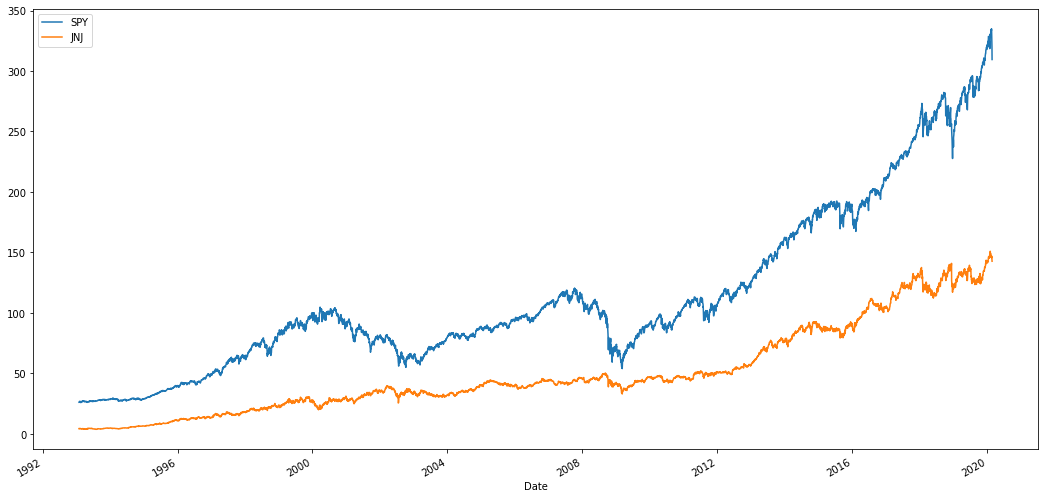

In [18]:
plt.figure(figsize=(18,9))
temp['SPY'].plot()
temp['JNJ'].plot()
plt.legend(['SPY', 'JNJ'])

In [19]:
X = temp[intersect]
Y = temp['SPY_LAG']

In [28]:
cutoff = int(X.shape[0] * 0.8)

In [33]:
X_tv, X_test = X.iloc[:cutoff], X.iloc[cutoff:]
Y_tv, Y_test = Y.iloc[:cutoff], Y.iloc[cutoff:]

# Regullarized reg vs. OLS

In [93]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [74]:
alpha = np.linspace(0.001, 1000, 300)

In [75]:
l1reg = LassoCV(alphas=alpha, fit_intercept=True, cv=10, n_jobs=-1).fit(X_tv, Y_tv)
l1_pred = l1reg.predict(X_test)

In [76]:
l2reg = RidgeCV(alphas=alpha, fit_intercept=True, cv=10).fit(X_tv, Y_tv)
l2_pred = l2reg.predict(X_test)

In [77]:
ols = sm.OLS(Y, sm.add_constant(X)).fit()
ols_pred = ols.predict(sm.add_constant(X_test))

In [78]:
l1_mse = mean_squared_error(Y_test.values, l1_pred)
l1_mse

613.1948758369899

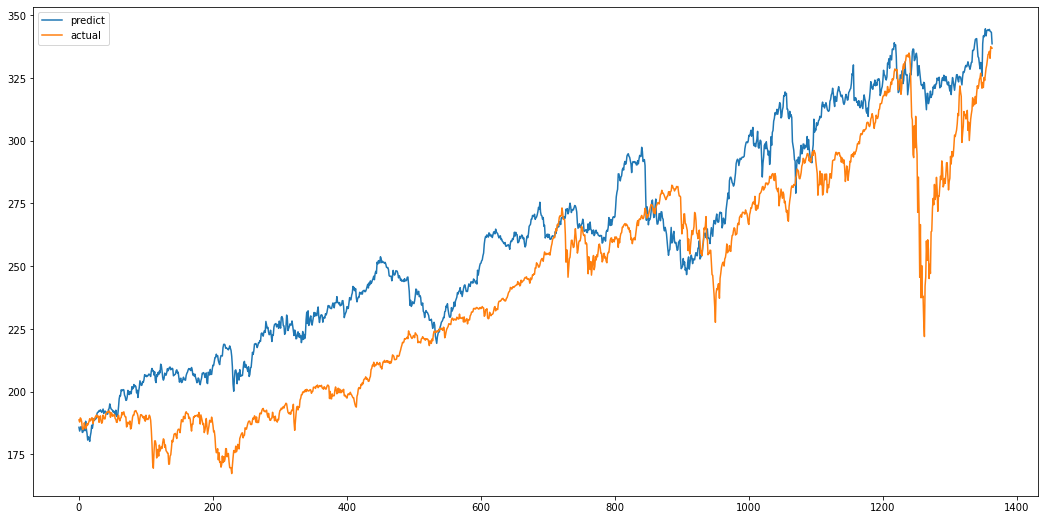

In [79]:
plt.figure(figsize=(18,9))
plt.plot(l1_pred)
plt.plot(Y_test.values)
plt.legend(['predict', 'actual'])


In [80]:
l2_mse = mean_squared_error(Y_test.values, l2_pred)
l2_mse

793.6313449341887

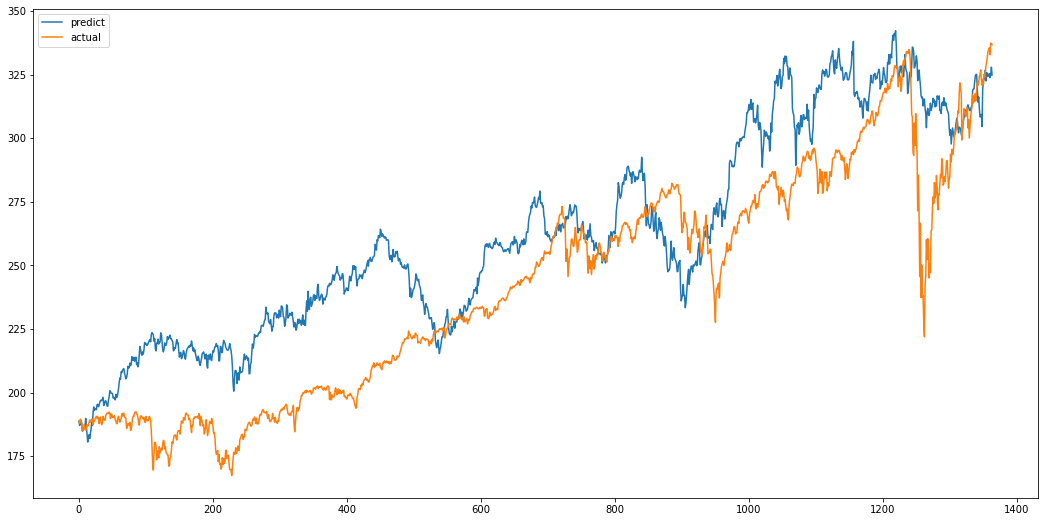

In [81]:
plt.figure(figsize=(18,9))
plt.plot(l2_pred)
plt.plot(Y_test.values)
plt.legend(['predict', 'actual'])


In [85]:
ols_mse = mean_squared_error(Y_test.values, ols_pred.values)
ols_mse

194.08921414073762

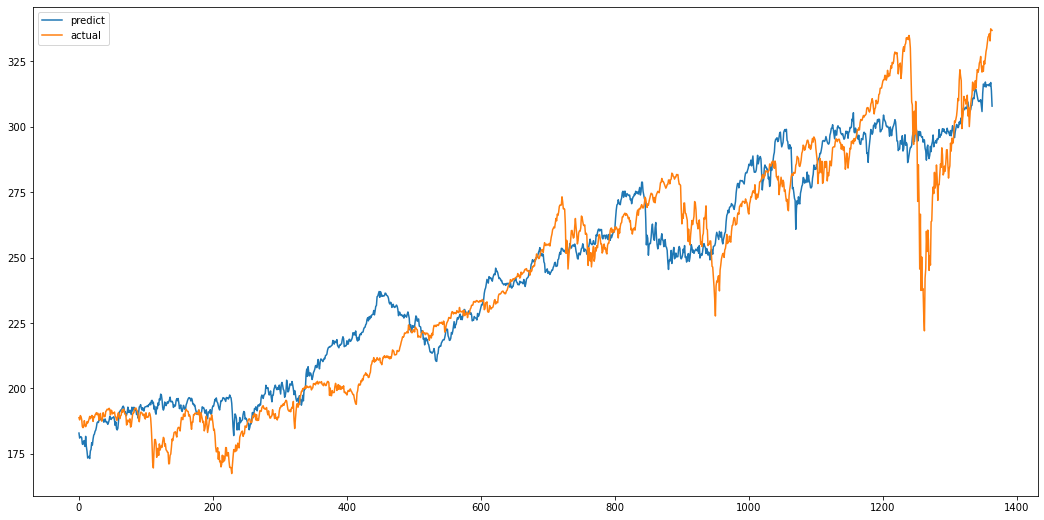

In [86]:
plt.figure(figsize=(18,9))
plt.plot(ols_pred.values)
plt.plot(Y_test.values)
plt.legend(['predict', 'actual'])


In [90]:
def pct_change(arr):
    return np.diff(arr) / arr[1:]

In [96]:
l1_pctmse = mean_absolute_error(pct_change(Y_test.values), pct_change(l1_pred))
l1_pctmse * 100

0.9716041105653812

In [97]:
l2_pctmse = mean_absolute_error(pct_change(Y_test.values), pct_change(l2_pred))
l2_pctmse * 100

1.0666564248640165

In [98]:
ols_pctmse = mean_absolute_error(pct_change(Y_test.values), pct_change(ols_pred.values))
ols_pctmse * 100

0.9161154420114914

In [106]:
ols_pred

Date
2014-09-24    182.881506
2014-09-25    180.954049
2014-09-26    181.456067
2014-09-29    181.487735
2014-09-30    181.161952
                 ...    
2020-02-19    316.333019
2020-02-20    315.589844
2020-02-21    316.899132
2020-02-24    313.842185
2020-02-25    307.867619
Length: 1364, dtype: float64

In [109]:
temp['SPY_LAG']

Date
1993-01-29     26.83
1993-02-01     26.97
1993-02-02     27.12
1993-02-03     27.10
1993-02-04     27.04
               ...  
2020-02-19    335.57
2020-02-20    332.80
2020-02-21    337.44
2020-02-24    336.83
2020-02-25    336.84
Name: SPY_LAG, Length: 6817, dtype: float64

In [110]:
temp['SPY'].iloc[-1364:]

Date
2014-09-24    178.01
2014-09-25    175.14
2014-09-26    176.53
2014-09-29    176.21
2014-09-30    175.75
               ...  
2020-02-19    334.89
2020-02-20    333.51
2020-02-21    330.08
2020-02-24    319.13
2020-02-25    309.46
Name: SPY, Length: 1364, dtype: float64

In [112]:
inventory = 0
asset = 0
record = [0]
forecast_diff = ols_pred.values
original_arr = temp['SPY'].iloc[-1364:].values

for t in range(len(forecast_diff)):
    trend_good = forecast_diff[t] > original_arr[t]
    price = original_arr[t]
    if trend_good and inventory == 0:
        # buy
        asset -= price
        inventory += 1
    elif not trend_good and inventory == 1:
        # sell
        asset += price
        inventory -= 1
    elif t == len(forecast_diff) - 1 and inventory == 1:
        asset += price
        inventory -= 1
    else:
        asset = record[-1]
    record.append(asset)



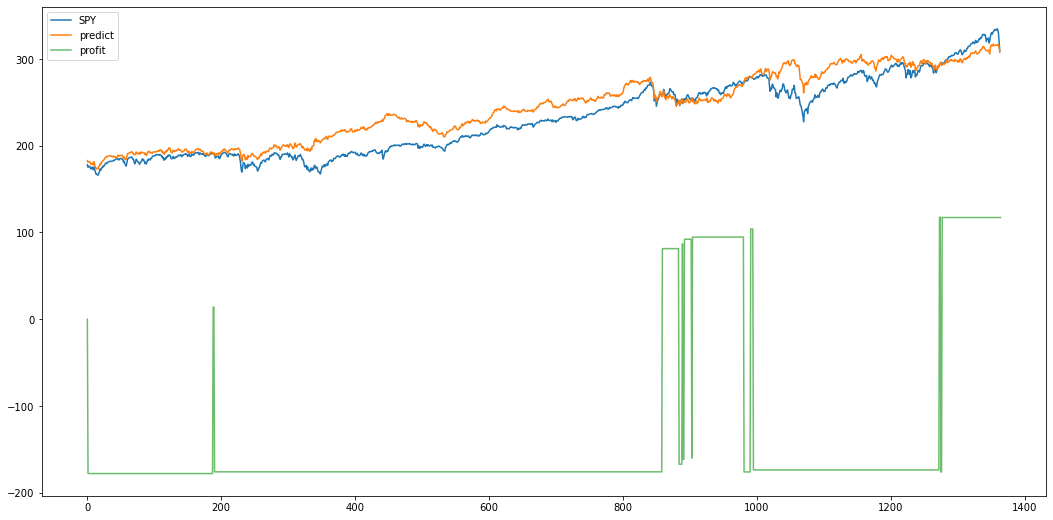

In [113]:
plt.figure(figsize=(18,9))
plt.plot(original_arr)
plt.plot(ols_pred.values)
plt.plot(record, alpha=0.7)
plt.legend(['SPY', 'predict', 'profit'])



In [80]:
asset

92.70999999999997

In [1]:
test = {5:[1,3,4],
2: [0,4,2],
8: [0,4,1]}

In [3]:
test[min(test.keys())]

[0, 4, 2]